In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("Jean-Baptiste/camembert-ner")
model = AutoModelForTokenClassification.from_pretrained("Jean-Baptiste/camembert-ner")


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers import pipeline

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")
nlp("Apple est créée le 1er avril 1976 dans le garage de la maison d'enfance de Steve Jobs à Los Altos en Californie par Steve Jobs, Steve Wozniak et Ronald Wayne14, puis constituée sous forme de société le 3 janvier 1977 à l'origine sous le nom d'Apple Computer, mais pour ses 30 ans et pour refléter la diversification de ses produits, le mot « computer » est retiré le 9 janvier 2015.")


[{'entity_group': 'ORG',
  'score': 0.9472818374633789,
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity_group': 'PER',
  'score': 0.9838564991950989,
  'word': 'Steve Jobs',
  'start': 74,
  'end': 85},
 {'entity_group': 'LOC',
  'score': 0.9831605950991312,
  'word': 'Los Altos',
  'start': 87,
  'end': 97},
 {'entity_group': 'LOC',
  'score': 0.9834540486335754,
  'word': 'Californie',
  'start': 100,
  'end': 111},
 {'entity_group': 'PER',
  'score': 0.9841555754343668,
  'word': 'Steve Jobs',
  'start': 115,
  'end': 126},
 {'entity_group': 'PER',
  'score': 0.9843501806259155,
  'word': 'Steve Wozniak',
  'start': 127,
  'end': 141},
 {'entity_group': 'PER',
  'score': 0.9841533899307251,
  'word': 'Ronald Wayne',
  'start': 144,
  'end': 157},
 {'entity_group': 'ORG',
  'score': 0.9468960364659628,
  'word': 'Apple Computer',
  'start': 243,
  'end': 257}]

[{'entity_group': 'ORG',
  'score': 0.9472818374633789,
  'word': 'Apple',
  'start': 0,
  'end': 5},
 {'entity_group': 'PER',
  'score': 0.9838564991950989,
  'word': 'Steve Jobs',
  'start': 74,
  'end': 85},
 {'entity_group': 'LOC',
  'score': 0.9831605950991312,
  'word': 'Los Altos',
  'start': 87,
  'end': 97},
 {'entity_group': 'LOC',
  'score': 0.9834540486335754,
  'word': 'Californie',
  'start': 100,
  'end': 111},
 {'entity_group': 'PER',
  'score': 0.9841555754343668,
  'word': 'Steve Jobs',
  'start': 115,
  'end': 126},
 {'entity_group': 'PER',
  'score': 0.9843501806259155,
  'word': 'Steve Wozniak',
  'start': 127,
  'end': 141},
 {'entity_group': 'PER',
  'score': 0.9841533899307251,
  'word': 'Ronald Wayne',
  'start': 144,
  'end': 157},
 {'entity_group': 'ORG',
  'score': 0.9468960364659628,
  'word': 'Apple Computer',
  'start': 243,
  'end': 257}]

In [5]:
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

with open('data_light.txt', 'r', encoding='utf-8') as file:
    text = file.read()

result = nlp(text)

for entity in result:
    print(entity)


{'entity_group': 'ORG', 'score': 0.9881047, 'word': 'Bernheim Comofi', 'start': 0, 'end': 15}
{'entity_group': 'ORG', 'score': 0.995381, 'word': 'Fortis Real Estate', 'start': 117, 'end': 136}
{'entity_group': 'ORG', 'score': 0.9954529, 'word': 'Xerox', 'start': 157, 'end': 163}
{'entity_group': 'ORG', 'score': 0.99499834, 'word': 'Artwork Systems', 'start': 186, 'end': 202}
{'entity_group': 'PER', 'score': 0.99866045, 'word': 'Nicolas Moreau', 'start': 324, 'end': 339}
{'entity_group': 'ORG', 'score': 0.995311, 'word': 'AXA Investment Managers', 'start': 370, 'end': 393}
{'entity_group': 'PER', 'score': 0.99842966, 'word': 'Donald Brydon', 'start': 397, 'end': 411}
{'entity_group': 'ORG', 'score': 0.99534893, 'word': 'AXA Investment Managers', 'start': 425, 'end': 448}
{'entity_group': 'PER', 'score': 0.9984827, 'word': 'Donald Brydon', 'start': 449, 'end': 463}
{'entity_group': 'PER', 'score': 0.99893486, 'word': 'Giuseppe Spadafora', 'start': 599, 'end': 618}
{'entity_group': 'ORG',

In [6]:
import nltk
import json
with open('data_light.txt', 'r', encoding='utf-8') as file:
    text = file.read()

sentences = nltk.sent_tokenize(text)
results_by_sentence = []

for sentence in sentences:
    result = nlp(sentence)
    results_by_sentence.append(result)
  
print ("[")
    
for i, sentence_result in enumerate(results_by_sentence):
    print ("{")
    print(f"Phrase {i+1}:")
    print(sentences[i])
    print("\n")

    for entity in sentence_result:
        print(entity)
        print ("}")

    print("\n")

print ("]") 

[
{
Phrase 1:
Bernheim Comofi est présente dans trois domaines d'activités de l'investissement immobilier et viendra donc renforcer Fortis Real Estate.


{'entity_group': 'ORG', 'score': 0.99411726, 'word': 'Bernheim Comofi', 'start': 0, 'end': 15}
}
{'entity_group': 'ORG', 'score': 0.99466336, 'word': 'Fortis Real Estate', 'start': 117, 'end': 136}
}


{
Phrase 2:
Le groupe américain Xerox et la société gantoise Artwork Systems (software pour le secteur graphique) ont annoncé ce mercredi un accord dont les détails financiers n'ont pas été révélés.


{'entity_group': 'ORG', 'score': 0.99538773, 'word': 'Xerox', 'start': 19, 'end': 25}
}
{'entity_group': 'ORG', 'score': 0.9930859, 'word': 'Artwork Systems', 'start': 48, 'end': 64}
}


{
Phrase 3:
Nicolas Moreau est nommé directeur général d'AXA Investment Managers par Donald Brydon, président d'AXA Investment Managers.


{'entity_group': 'PER', 'score': 0.99784935, 'word': 'Nicolas Moreau', 'start': 0, 'end': 14}
}
{'entity_group': 'ORG

In [7]:
import json
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
import nltk

# Charger le modèle et le tokenizer
model_name = "Jean-Baptiste/camembert-ner"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Initialiser le pipeline NER
nlp = pipeline('ner', model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Charger le contenu du fichier texte
with open('data_light.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Diviser le texte en phrases en utilisant nltk
sentences = nltk.sent_tokenize(text)

# Stocker les entités nommées dans un fichier JSON
output_file_path = 'entites_par_phrase3.json'
resultats_entites = []

for sentence in sentences:
    # Appliquer NER sur chaque phrase
    result = nlp(sentence)
    # Convertir les scores en float
    for entity in result:
        entity['score'] = float(entity['score'])
    # Ajouter la phrase et ses entités nommées à la liste des résultats
    resultats_entites.append({'phrase': sentence, 'entites': result})

# Écrire la liste des résultats dans le fichier JSON
with open(output_file_path, 'w', encoding='utf-8') as output_file:
    json.dump(resultats_entites, output_file, ensure_ascii=False, indent=2, default=str)

print(f"Les labels par phrase ont été stockées dans le fichier : {output_file_path}")


Les labels par phrase ont été stockées dans le fichier : entites_par_phrase3.json


{
Phrase 1:
Bernheim Comofi est présente dans trois domaines d'activités de l'investissement immobilier et viendra donc renforcer Fortis Real Estate.


{'entity_group': 'ORG', 'score': 0.99411726, 'word': 'Bernheim Comofi', 'start': 0, 'end': 15}
}
{'entity_group': 'ORG', 'score': 0.99466336, 'word': 'Fortis Real Estate', 'start': 117, 'end': 136}
}


{
Phrase 2:
Le groupe américain Xerox et la société gantoise Artwork Systems (software pour le secteur graphique) ont annoncé ce mercredi un accord dont les détails financiers n'ont pas été révélés.


{'entity_group': 'ORG', 'score': 0.99538773, 'word': 'Xerox', 'start': 19, 'end': 25}
}
{'entity_group': 'ORG', 'score': 0.9930859, 'word': 'Artwork Systems', 'start': 48, 'end': 64}
}


{
Phrase 3:
Nicolas Moreau est nommé directeur général d'AXA Investment Managers par Donald Brydon, président d'AXA Investment Managers.


{'entity_group': 'PER', 'score': 0.99784935, 'word': 'Nicolas Moreau', 'start': 0, 'end': 14}
}
{'entity_group': 'ORG',

TypeError: 'ellipsis' object is not subscriptable

In [247]:
import json

with open('entites_par_phrase3.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        print(json.dumps(element, indent=2))
        print("----")


{
  "phrase": "Bernheim Comofi est pr\u00e9sente dans trois domaines d'activit\u00e9s de l'investissement immobilier et viendra donc renforcer Fortis Real Estate.",
  "entites": [
    {
      "entity_group": "ORG",
      "score": 0.994117259979248,
      "word": "Bernheim Comofi",
      "start": 0,
      "end": 15
    },
    {
      "entity_group": "ORG",
      "score": 0.9946633577346802,
      "word": "Fortis Real Estate",
      "start": 117,
      "end": 136
    }
  ]
}
----
{
  "phrase": "Le groupe am\u00e9ricain Xerox et la soci\u00e9t\u00e9 gantoise Artwork Systems (software pour le secteur graphique) ont annonc\u00e9 ce mercredi un accord dont les d\u00e9tails financiers n'ont pas \u00e9t\u00e9 r\u00e9v\u00e9l\u00e9s.",
  "entites": [
    {
      "entity_group": "ORG",
      "score": 0.9953877329826355,
      "word": "Xerox",
      "start": 19,
      "end": 25
    },
    {
      "entity_group": "ORG",
      "score": 0.9930859208106995,
      "word": "Artwork Systems",
      "sta

In [267]:
import json

data = []

with open('entites_par_phrase3.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)

    for entites in json_content:
        label = entites.get('ententitesity_group', '')
        text = entites.get('word', '')
        element_labels = [entites.get('entity_group', [])  for label_info in labels_info]

        # Check if the label is 'ORG' (or any other specific label)
        if label == 'ORG':
            data.append({'label': label, 'text': text})

print(label)


In [277]:
import json

data = []

with open('entites_par_phrase3.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('phrase', '')
        labels = element.get('entites', [])
        
        # Extract all labels into a list
        element_labels = [label_info.get('entity_group', []) for label_info in labels]
        
        # Append the list of labels to the data vector
        data.append(element_labels)

print(labels)


[{'entity_group': 'LOC', 'score': 0.9985024929046631, 'word': 'Saint-Just Saint-Rambert', 'start': 6, 'end': 31}, {'entity_group': 'PER', 'score': 0.9191649556159973, 'word': 'Olivier JOLY', 'start': 47, 'end': 60}, {'entity_group': 'LOC', 'score': 0.9977805614471436, 'word': 'SAINT-JUST SAINT-RAMBERT', 'start': 69, 'end': 94}, {'entity_group': 'LOC', 'score': 0.9984951615333557, 'word': 'Veaune', 'start': 257, 'end': 264}, {'entity_group': 'LOC', 'score': 0.9985626339912415, 'word': 'Merdarioux', 'start': 270, 'end': 281}, {'entity_group': 'ORG', 'score': 0.9360034465789795, 'word': 'EI TEST', 'start': 299, 'end': 307}]


In [191]:
import json

data = []

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('text', '')
        labels = element.get('label', [])
        
        # Extract all labels into a list
        element_labels = [label_info.get('labels', []) for label_info in labels]
        
        # Append the list of labels to the data vector
        data.append(element_labels)

print(data)


[[['ORG'], ['ORG']], [['ORG'], ['ORG']], [['PERS'], ['ORG'], ['PERS'], ['ORG'], ['PERS']], [['ORG'], ['PERS'], ['ORG'], ['PERS']], [['LOC'], ['ORG'], ['ORG'], ['LOC'], ['ORG']], [['ORG'], ['PERS'], ['ORG'], ['ORG'], ['ORG'], ['PERS'], ['PERS']], [['ORG'], ['ORG'], ['LOC'], ['PERS']], [['ORG'], ['PERS'], ['ORG'], ['LOC'], ['LOC']], [['ORG'], ['LOC'], ['ORG'], ['LOC']], [['PERS'], ['PERS'], ['PERS'], ['ORG'], ['ORG']], [['PERS']], [['LOC'], ['LOC']], [['LOC'], ['LOC'], ['LOC']], [['ORG'], ['LOC'], ['LOC'], ['LOC']], [['LOC'], ['ORG']], [['LOC']], [['ORG'], ['LOC'], ['LOC']], [['LOC'], ['LOC']], [['LOC'], ['ORG'], ['PERS'], ['LOC']], [['ORG'], ['LOC']], [['ORG'], ['ORG'], ['LOC'], ['LOC'], ['ORG']], [['LOC'], ['ORG']], [['LOC'], ['LOC']], [['LOC'], ['ORG'], ['ORG'], ['LOC']], [['LOC'], ['LOC']], [['LOC'], ['LOC'], ['ORG']], [['LOC'], ['LOC'], ['LOC'], ['PERS'], ['LOC']], [['ORG'], ['LOC']], [['ORG'], ['LOC']], [['LOC'], ['LOC']], [['ORG'], ['LOC'], ['ORG']], [['ORG'], ['LOC']], [['ORG'], 

In [194]:
import json

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        print(json.dumps(element, indent=2))
        print("----")

        label_info = element.get('label', [])

        for label in label_info:
            # Check if 'ORG' is in the list of labels
            if 'ORG' in label.get('labels', []):
                data.append(text)

print(data)

SyntaxError: invalid syntax (971916112.py, line 14)

In [214]:
import json

data = []

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('text', '')
        element_labels = label_info.get('labels', []) 
                   
        for labels in element_labels:
            if ['ORG'] in element_labels :
             data.append(text)

print(data)


AttributeError: 'str' object has no attribute 'get'

In [207]:
import json

data = []

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('text', '')
        label =[label_info.get('labels', [])
        
        for label in label_info:
            # Check if 'entity_group' is 'ORG'
            if element.get('label', '') == 'PER':
                text_label = label.get('text', '')
                data.append([text_label])

print(data)


SyntaxError: invalid syntax (3934402685.py, line 12)

In [213]:
import json

data = []

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('text', '')
        labels_info = element.get('labels', [])

        for label in labels_info:
            # Check if 'labels' is 'PER'
            if ['PER'] in label.get('labels', []):
                text_label = label.get('text', '')
                data.append([text_label])

print(labels_info)


[]


Comparaison

In [89]:
import json
data2 = []

data = []

with open('data_light_ettiquete.json', 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
    
    for element in json_content:
        text = element.get('text', '')
        labels = element.get('label', [])
        
        for label in labels:
          if element.get('entity_group','') == 'ORG':
                 text_label = label.get('text', '')
            #labels_label = ', '.join(label.get('labels', []))
             data.append([text_label])
            

print(data)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 17)

In [26]:

with open("entites_par_phrase3.json", 'r', encoding='utf-8') as json_file:
    json_content = json.load(json_file)
     
 
    for element in json_content:
        words = element.get('word', '')
        entitess = element.get('entites', [])
        
        for entites in entitess:
            text_label = entites.get('word', '')
            labels_label = ', '.join(entites.get('entitess', []))
            
            data2.append([text_label])
            

print(data2)

[['Bernheim Comofi'], ['Fortis Real Estate'], ['Xerox'], ['Artwork Systems'], ['Nicolas Moreau'], ['AXA Investment Managers'], ['Donald Brydon'], ["'AXA Investment Managers"], ['Donald Brydon'], ['Giuseppe Spadafora'], ['BNP Paribas'], ['Italie'], ['Robert Ricci'], ['BNP Paribas Suisse SA'], ['Charles Romieu'], ['Etat'], ['Charles'], ['-'], ['Romieu'], ['Etat'], ['Axens'], ['Jean Sentenac'], ["'Axens"], ['Institut français du pétrole'], ['IFP'], ['Protacalyse'], ['Jean-Claude Barbier'], ['Jean-Pierre Franck'], ['Comat métal industrie'], ['Comat métal industrie'], ['Montreuil-Juigné'], ['Tortiger'], ['Cabinet'], ['Bedin'], ['Yvette Bedin'], ['Cabinet'], ['Bed'], ['in'], ['Pessac'], ['Gironde'], ['Gironde'], ['KDI'], ['Carquefou'], ['KDI'], ['Carquefou'], ['Bill Gates'], ['Pascale Perrin'], ['SinfoBio'], ['Pascale Perrin'], ['Inserm'], ['Institut national de la santé et de la recherche médicale'], ['SinfoB'], ['io'], ['Microsoft Office'], ['Manuel GUIBERT'], ['Vice-'], ['Rophémel'], ['Né

In [25]:

for char1, char2 in zip(data, data2):
    if char1 == char2:
        print(f"{char1} est égal à {char2}")
    else:
        print(f"{char1} est différent de {char2}")

['Bernheim Comofi'] est égal à ['Bernheim Comofi']
['Fortis Real Estate'] est égal à ['Fortis Real Estate']
['Xerox'] est égal à ['Xerox']
['Artwork Systems'] est égal à ['Artwork Systems']
['Nicolas Moreau'] est égal à ['Nicolas Moreau']
['AXA Investment Managers'] est égal à ['AXA Investment Managers']
['Donald Brydon'] est égal à ['Donald Brydon']
['AXA Investment Managers'] est différent de ["'AXA Investment Managers"]
['Donald Brydon'] est égal à ['Donald Brydon']
['BNP Paribas Italie'] est différent de ['Giuseppe Spadafora']
['Robert Ricci'] est différent de ['BNP Paribas']
['BNP Paribas Suisse SA'] est différent de ['Italie']
['Giuseppe Spadafora'] est différent de ['Robert Ricci']
['Charles Romieu'] est différent de ['BNP Paribas Suisse SA']
['DDASS'] est différent de ['Charles Romieu']
["Les services sociaux de l'Etat"] est différent de ['Etat']
['hôpital Charles-Romieu'] est différent de ['Charles']
["services sociaux de l'Etat"] est différent de ['-']
['Axens'] est différent

In [24]:
def jaccard_similarity(data, data2):
    set1 = set(tuple(row) for row in data)
    set2 = set(tuple(row) for row in data2)
    
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    
    similarity = intersection / union
    
    return similarity



Matrice de confusion : {'true_positive': 109, 'false_positive': 241, 'false_negative': 109, 'true_negative': 350}
Précision : 0.31142857142857144
Rappel : 0.5


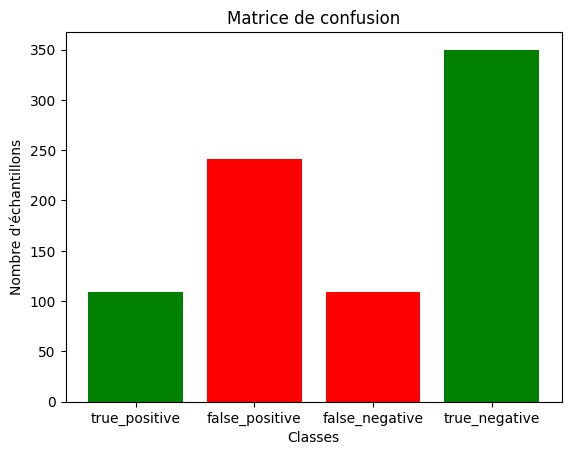

In [22]:
import matplotlib.pyplot as plt

def confusion_matrix(data, data2):
    set1 = set(tuple(row) for row in data)
    set2 = set(tuple(row) for row in data2)

    true_positive = len(set1.intersection(set2))
    false_positive = len(set2 - set1)
    false_negative = len(set1 - set2)
    true_negative = len(set1.symmetric_difference(set2))

    matrix = {
        'true_positive': true_positive,
        'false_positive': false_positive,
        'false_negative': false_negative,
        'true_negative': true_negative
    }

    return matrix




def precision_recall(matrix):
    precision = matrix['true_positive'] / (matrix['true_positive'] + matrix['false_positive'])
    recall = matrix['true_positive'] / (matrix['true_positive'] + matrix['false_negative'])

    return precision, recall

def plot_confusion_matrix(matrix):
    labels = list(matrix.keys())
    values = list(matrix.values())

    plt.bar(labels, values, color=['green', 'red', 'red', 'green'])
    plt.xlabel('Classes')
    plt.ylabel('Nombre d\'échantillons')
    plt.title('Matrice de confusion')
    plt.show()


matrix = confusion_matrix(data, data2)
precision, recall = precision_recall(matrix)

print(f"Matrice de confusion : {matrix}")
print(f"Précision : {precision}")
print(f"Rappel : {recall}")

# Affichage de l'histogramme
plot_confusion_matrix(matrix)


In [43]:
def slot_error_rate(confusion_matrix):
    D = confusion_matrix['false_negative']
    I = confusion_matrix['false_positive']
    T = confusion_matrix['true_positive']
    F = confusion_matrix['true_negative']
    
    TF = confusion_matrix['type_frontiere']
    R = D + I + T + F + TF
    SER = (D + I + TF +0.5 * (T+F)) / R
    return SER

# Exemple d'utilisation avec votre matrice de confusion
matrice_confusion = {'true_positive': 109, 'false_positive': 241, 'false_negative': 109, 'true_negative': 350, 'type_frontiere': }
ser_result = slot_error_rate(matrice_confusion)
print(f"Slot Error Rate (SER): {ser_result}")


Slot Error Rate (SER): 0.7163164400494437


784
